In [3]:
# Import neccessary libaries

import pandas as pd # Dataframes
import numpy as np # Arrays and Math

# Visual libraries
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as pe
import matplotlib.pyplot as plt

# set plt inline so plots will automatically run without the .show() command
%matplotlib inline 

# Warnings set to Ignore messages
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import the sample dataset as a DataFrame
data = pd.read_csv('ted_main.csv')

In [5]:
# Create a copy DataFrame, keeping data as backup if needed
df = data.copy()

In [6]:
# View the top 5 rows of data
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [7]:
# View the bottom 5 rows of data
df.tail()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,1496707200,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,1505851216,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,1492992000,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,1505919737,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470
2547,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.ted.com/talks/theo_e_j_wilson_a_bl...,419309
2549,8,With more than half of the world population li...,519,TED2017,1492992000,1,Karoliina Korppoo,Karoliina Korppoo: How a video game might help...,1,1506092422,"[{'id': 21, 'name': 'Unconvincing', 'count': 2...","[{'id': 2682, 'hero': 'https://pe.tedcdn.com/i...",Game designer,"['cities', 'design', 'future', 'infrastructure...",How a video game might help us build better ci...,https://www.ted.com/talks/karoliina_korppoo_ho...,391721


In [8]:
# Inspect the overall shape of the data (rows/columns)
df.shape

(2550, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

The dataset is comprised of 2,550 rows and 17 columns.  There are **no null values** out of the 2,550 entries, however, Speaker Occupation appears to have 4 **duplicate values** which could be NAs and will require further analysis.

### Convert Object Data Type to Category
This quick change saves space and allows for easier data presentation when using categorical variables.

In [28]:
for columns in df:
    if df[columns].dtype == 'object':
        df[columns] = df[columns].astype('category')

In [29]:
# Reexamine DataFrame ensuring all datatypes previously Object are now Categorical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   comments            2550 non-null   int64   
 1   description         2550 non-null   category
 2   duration            2550 non-null   int64   
 3   event               2550 non-null   category
 4   film_date           2550 non-null   int64   
 5   languages           2550 non-null   int64   
 6   main_speaker        2550 non-null   category
 7   name                2550 non-null   category
 8   num_speaker         2550 non-null   int64   
 9   published_date      2550 non-null   int64   
 10  ratings             2550 non-null   category
 11  related_talks       2550 non-null   category
 12  speaker_occupation  2550 non-null   category
 13  tags                2550 non-null   category
 14  title               2550 non-null   category
 15  url                 2550 non-null   ca

In [10]:
# Inspect total count of null values in dataset
df.isnull().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [11]:
# Inspect total count of NA (NaN) values in dataset
df.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

Due to the fact that there are **only 6 speakers with missing occupations**, all of whom can likely be searched online for generic occupations, these entries can be **manually encoded**.

In [12]:
# Create a list of speakers with missing occupations
speakers = df['main_speaker'][df['speaker_occupation'].isna() == True].values.tolist()

# create an, ordered, input list for respective speaker occupations (from online search)
occupations_input = ['Designer', 'Entrepreneur', 'CEO', 'Inventor', 'Artist', 'Journalist']

# for loop to update each speaker with respective occupation that was missig
for speaker in speakers:
    for occupation in occupations_input:
        df['speaker_occupation'][df['main_speaker'] == speaker] = occupation

In [13]:
# Recheck the count of NAs to ensure above loop removed all
df.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    0
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [17]:
# Inspect total unique counts by column

df.nunique()

comments               559
description           2550
duration              1083
event                  355
film_date              735
languages               66
main_speaker          2156
name                  2550
num_speaker              5
published_date        2490
ratings               2550
related_talks         2550
speaker_occupation    1458
tags                  2530
title                 2550
url                   2550
views                 2550
dtype: int64

**Observations**
- 355 unique events listed (e.g. TED2017)
- The 66 unique languages and 559 unique comments tracked indicate **unique counts of languages/comments per event (e.g. 4 different languages and 10 comments for a given TED talk)**

In [14]:
# Run descriptive statistics summary for all variables - including categorical
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
comments,2550,NaN,NaN,NaN,191.562,282.315,2,63,118,221.75,6404
description,2550,2550,What makes a great leader? Management theorist...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,2550,NaN,NaN,NaN,826.51,374.009,135,577,848,1046.75,5256
event,2550,355,TED2014,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN
film_date,2550,NaN,NaN,NaN,1.32193e+09,1.19739e+08,7.46496e+07,1.25747e+09,1.33324e+09,1.41296e+09,1.50379e+09
languages,2550,NaN,NaN,NaN,27.3263,9.56345,0,23,28,33,72
main_speaker,2550,2156,Hans Rosling,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,2550,2550,Gayle Tzemach Lemmon: Meet the women fighting ...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_speaker,2550,NaN,NaN,NaN,1.02824,0.207705,1,1,1,1,5
published_date,2550,NaN,NaN,NaN,1.34353e+09,9.46401e+07,1.15137e+09,1.26846e+09,1.34094e+09,1.42343e+09,1.50609e+09


**Initial Sample Observations**
- The most frequest event (year) is TED2014 (84 occurences)
- Hans Rosling was the most frequent speaker (9 presentations)
- The most common speaker occupation is Writer (45 occurences)

In [15]:
# Inspect the top 10 speaker occupations
df['speaker_occupation'].value_counts().head(25)

Writer                                  45
Journalist                              39
Artist                                  34
Designer                                34
Entrepreneur                            31
Architect                               30
Inventor                                27
Psychologist                            26
Photographer                            25
Filmmaker                               21
Educator                                20
Economist                               20
Author                                  20
Neuroscientist                          20
Roboticist                              16
Philosopher                             16
Biologist                               15
Physicist                               14
Marine biologist                        11
Musician                                11
Technologist                            10
Global health expert; data visionary    10
Activist                                10
Graphic des

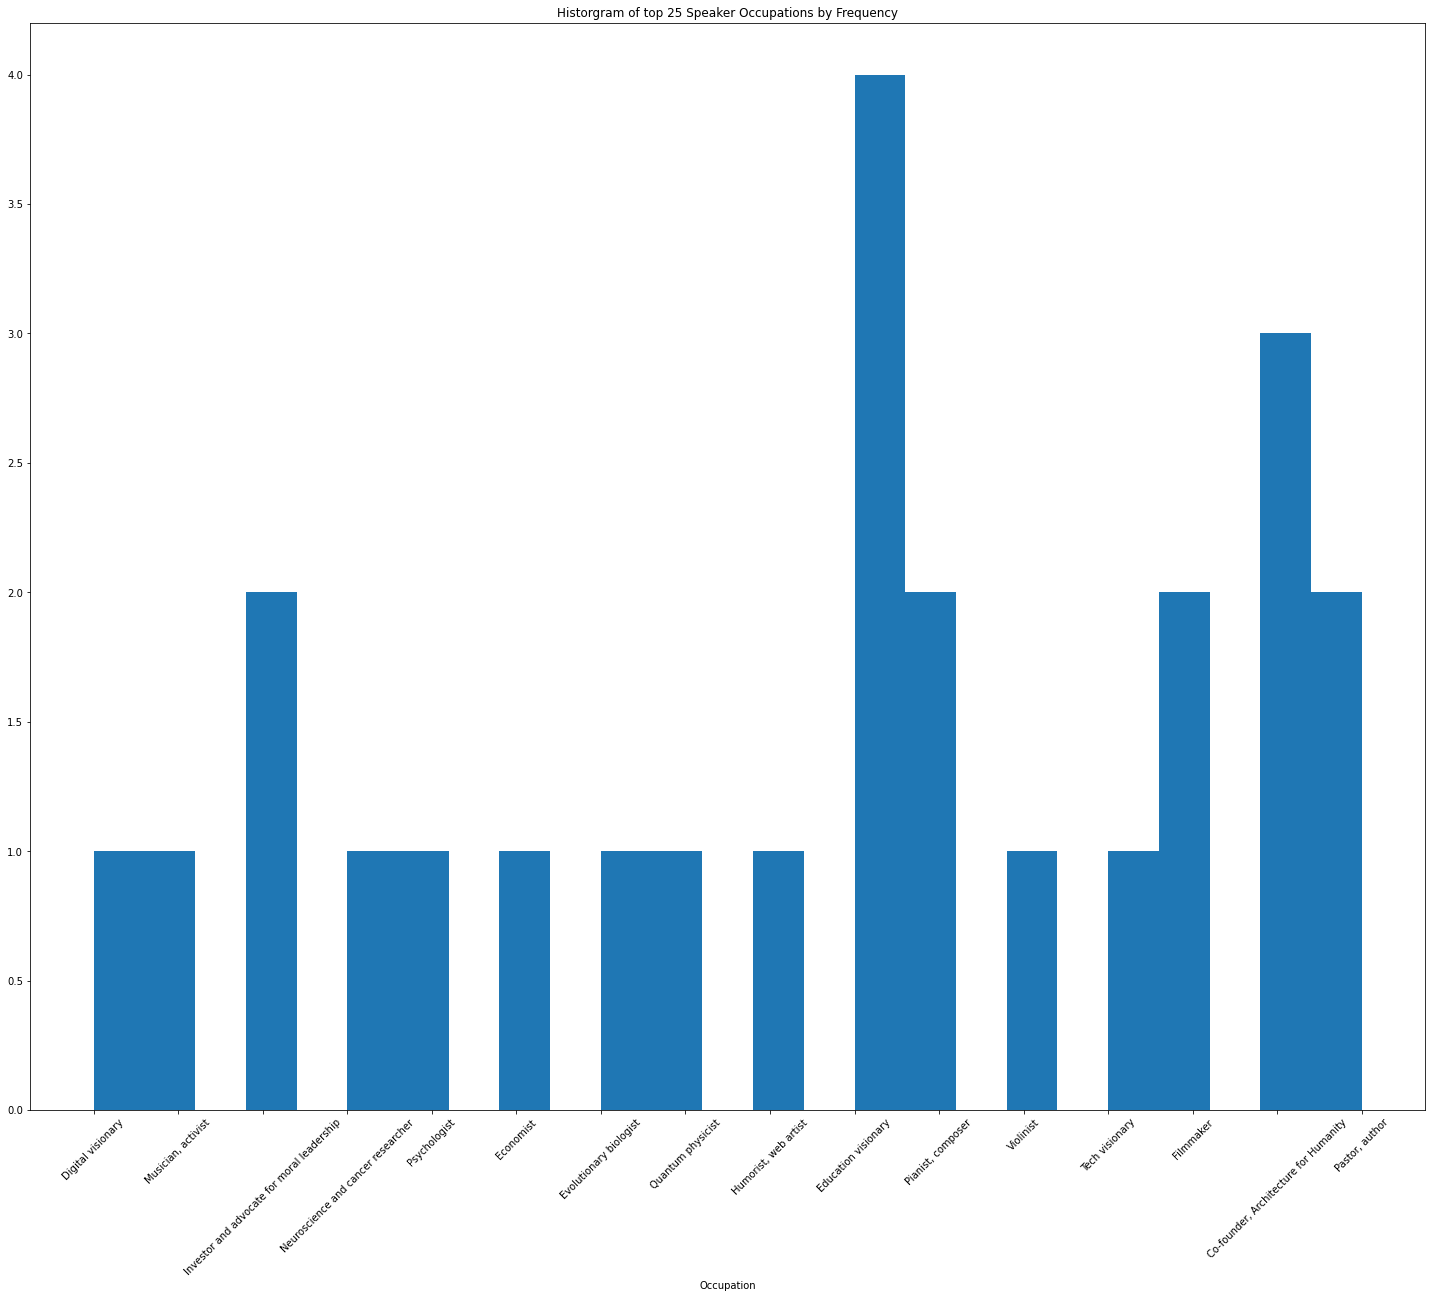

In [16]:
plt.figure(figsize = (25,20))
plt.hist(df['speaker_occupation'][df['speaker_occupation'].value_counts().head(25)], bins = 25)
plt.xticks(rotation = 45)
plt.title('Historgram of top 25 Speaker Occupations by Frequency')
plt.xlabel('Occupation');